# K-Means in Trading

We start with importing the necessary libraries and fetching the required data using the following commands.

#### Import Dataset

We will use the dataset which contains the data for 12 companies and is stored in the `sample_stocks.csv` file. You can download this file from the github link provided in "About The Book" section of this book.

In [1]:
# Importing the necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Read the data
DF = pd.read_csv(path + 'sample_stocks.csv', index_col=0)
DF

,ROE(%),Beta
ADBE,28.84,0.96
AEP,10.27,0.26
CSCO,22.53,0.89
EXC,8.57,0.43
FB,22.18,1.29
GOOGL,15.19,1.00
INTC,23.77,0.59
LNT,10.90,0.33
MSFT,34.74,0.78
STLD,21.34,1.45


As seen above, we have downloaded the data for the 12 stocks successfully.

We will now create a copy (df) of the original data and work with it. The first step is to pre-process the data so that it can be fed to a k-means clustering algorithm. This involves converting the data in a NumPy array format and scaling it.

Scaling amounts to subtracting the column mean and dividing by the column standard deviation from each data point in that column.

For scaling, we use the StandardScaler class of scikit-learn library as follows:

In [2]:
# Making a copy to work with
df = DF.copy()

# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# Printing pre-processed data
print(df_values)

[[ 1.29583307  0.59517359]
 [-1.00653849 -1.27029587]
 [ 0.51349787  0.40862664]
 [-1.21731025 -0.81725329]
 [ 0.47010369  1.4746092 ]
 [-0.39654021  0.70177185]
 [ 0.66723728 -0.39086027]
 [-0.92842895 -1.08374893]
 [ 2.02733507  0.11548144]
 [ 0.36595764  1.90100222]
 [-0.77592938 -0.47080896]
 [-1.01521733 -1.16369762]]


The next step is to import the 'KMeans' class from scikit-learn and fit a model with the value of hyperparameter 'K' (which is called n_clusters in scikit-learn) set to 2(randomly chosen) to which we fit our pre-processed data 'df_values'.

In [3]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=2).fit(df_values)

Thats it! 'km_model' is now trained and we can extract the cluster it has assigned to each stock as follows:

In [4]:
clusters = km_model.labels_
df['cluster']=clusters
df

,ROE(%),Beta,cluster
ADBE,28.84,0.96,1
AEP,10.27,0.26,0
CSCO,22.53,0.89,1
EXC,8.57,0.43,0
FB,22.18,1.29,1
GOOGL,15.19,1.00,1
INTC,23.77,0.59,1
LNT,10.90,0.33,0
MSFT,34.74,0.78,1
STLD,21.34,1.45,1


Now that we have the assigned clusters, we will visualise them using the matplotlib and seaborn libraries as follows:

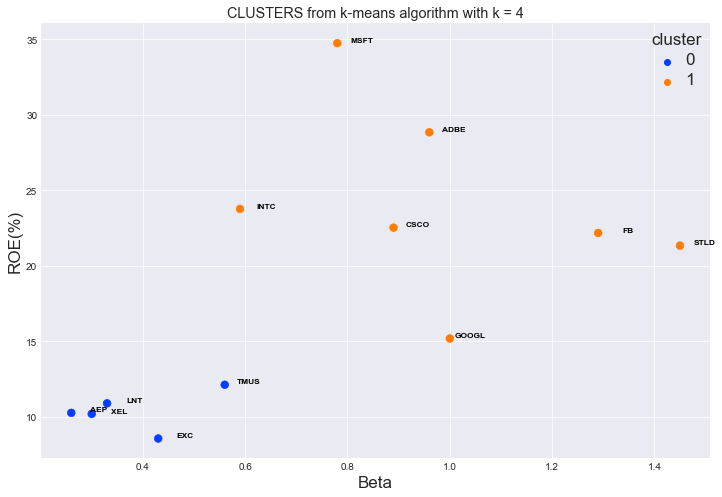

In [5]:
# Set graph size
plt.figure(figsize=(12, 8))

# Set x and y axis labels
ax = sns.scatterplot(y="ROE(%)", x="Beta", edgecolor='face',
                     hue="cluster", data=df, palette='bright', 
                     s=60)

# Plot the graph
plt.xlabel('Beta', size=17)
plt.ylabel('ROE(%)', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17')  
plt.setp(ax.get_legend().get_title(), fontsize='17')  
plt.title('CLUSTERS from k-means algorithm with k = 4', 
          fontsize='x-large')

# Label individual elements
for i in range(0, df.shape[0]):
    plt.text(df.Beta[i]+0.07, df['ROE(%)'][i]+0.01, df.index[i], 
             horizontalalignment='right',
             verticalalignment='bottom', size='small', 
             color='black', weight='semibold')

We can clearly see the difference between the two clusters in the graph above. 

#### Can you make an analysis on this cluster?

Cluster 1 largely consists of all the public utility companies which have a low ROE and low beta compared to high growth tech companies in Cluster 0.

Although we did not tell the k-means algorithm about the industry sectors to which the stocks belonged, it was able to discover that structure in the data itself. Therein lies the power and appeal of unsupervised learning.

The next question that arises is how to decide the value of hyperparameter k before fitting the model? 

We passed the value of hyperparameter k=2 on a random basis while fitting the model. 

What would happen if we had increased the number of clusters?

Let's say you took k = 8. Now, k-means algorithm will cumpulsorily try to create 8 clusters. But you know that your data set contains 12 companies, which means some clusters will have only one company. 

<b>How to find an optimum number of clusters?</b>

One of the ways of doing this is to check the model's 'inertia', which represents the distance of points in a cluster from its centroid. As more and more clusters are added, the inertia keeps on decreasing, creating what is called an 'elbow curve'. We select the value of k beyond which we do not see much benefit (i.e., decrement) in the value of inertia. Think about it, if there were 8 clusters, then in the cluster with one company, the inertia would be 0 and there would be no point in having that cluster.

Below we plot the inertia values for k-mean models with different values of 'k':

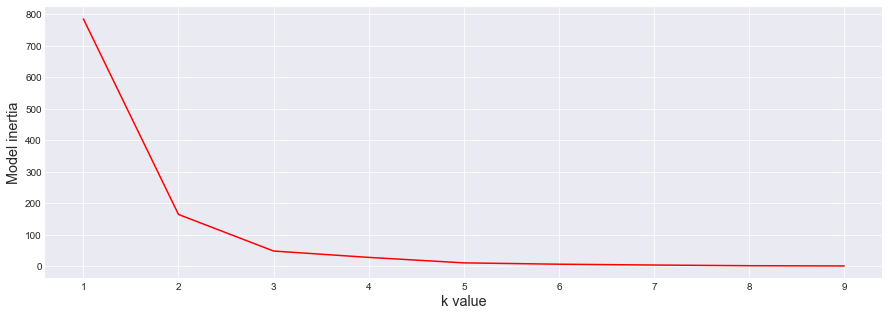

In [6]:
# Calculating inertia for k-means models with different values
# of 'k'
inertia = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

# Plotting the 'elbow curve'
plt.figure(figsize=(15,5))
plt.xlabel('k value',fontsize='x-large')
plt.ylabel('Model inertia',fontsize='x-large')
plt.plot(k_range,inertia,color='r')
plt.show()

As we can see that the inertia value shows marginal decrement after k= 3, a k-means model with k=3(three clusters) is the most suitable for this task.
You can try running the same algorithm but change the parameter to 3 and see how it changes.